In [376]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [377]:
!pip install tensorflow
# Импортируем модули и библиотеки
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import time
%matplotlib inline
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils
from keras.layers.core import Flatten
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, f1_score, recall_score, precision_score, classification_report
!pip install scikit-optimize
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1.1 Обучить модель без каких-либо дополнительных условий, которая должна наилучшим образом отработать на тестовой выборке преподавателя с точки зрения F-меры

In [378]:
classes_train = pd.read_csv('/content/drive/MyDrive/Fedoseev/classes_train.csv', delimiter=',')

In [379]:
classes_train

,is_bot
0,0
1,0
2,0
3,0
4,0
...,...
2395,1
2396,1
2397,1
2398,1


In [380]:
features_train = pd.read_csv('/content/drive/MyDrive/Fedoseev/features_train.csv', delimiter=',')

In [381]:
features_train

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,2.449650,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,1.913427,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142
2,704,3108,454,2400,77,0,0,0,1358,0.518409,2.288660,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,72.265781,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,4.279063,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,109,13,2,0,5,0,0,0,788,0.138325,0.016497,0.002538,0.000000,0.006345,6.500000,9,0,9,0,124
2396,5503,3,0,0,2,1,1,0,1382,3.981910,0.002171,0.000000,0.000000,0.001447,23524.000000,10,0,18,0,8
2397,2172,35504,0,2,140,1,1,0,1813,1.198014,19.583012,0.000000,0.001103,0.077220,23524.000000,15,0,16,0,130
2398,2513,19,0,0,4,1,1,0,1274,1.972527,0.014914,0.000000,0.000000,0.003140,23524.000000,14,0,17,0,95


In [382]:
X, y = features_train, classes_train

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=5, shuffle=True)

In [384]:
print(f"Классы в y_train:\n{y_train}")
print(f"Классы в y_test:\n{X_test}")

Классы в y_train:
      is_bot
1587       0
1899       1
2025       1
1915       1
2173       1
...      ...
1032       0
2121       1
1424       0
1725       0
2254       1

[1920 rows x 1 columns]
Классы в y_test:
      statuses_count  followers_count  friends_count  favourites_count  \
1001           21379            74498           4836             11414   
1558          285335          1101541           1378              1521   
246            30276            20278           4339              9807   
2281            2478              121              1                 0   
15              6653             2645           2002              2208   
...              ...              ...            ...               ...   
587            33682            45814            456             14547   
1018           14495             6331           2216              6620   
1670           95047            18804           2417              8998   
1964           35382               37       

In [385]:
# class_names = ['not_bot', 'bot']

In [386]:
# строим первую модель
first_model = RandomForestClassifier()

first_model.fit(X_train, y_train)

# Сохраняем предсказания сети 
predict_forest = first_model.predict(X_test)

F1-score without hypertuning for RandomForestClassifier:  0.9960159362549801
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      0.99      1.00       126

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



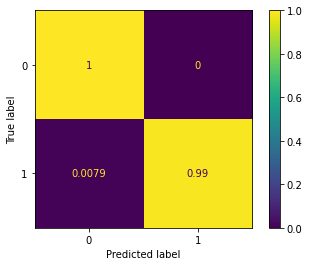

In [387]:
# посмотрим f-score и матрицу ошибок

print("F1-score without hypertuning for RandomForestClassifier: ", f1_score(y_test, predict_forest))
plot_confusion_matrix(first_model, X_test, y_test, normalize='true')
print(classification_report(y_test, predict_forest))

In [388]:
with open('/content/drive/MyDrive/Fedoseev/first_model.pkl', 'wb') as f:
    pickle.dump(first_model, f)

In [389]:
# Сохраняем модель
# model.save('/content/drive/MyDrive/Fedoseev/my_first_model.h5')

## 2.1 Максимально логичным образом обучить качественную модель, использующую для работы только 10 признаков из всего исходного множества.

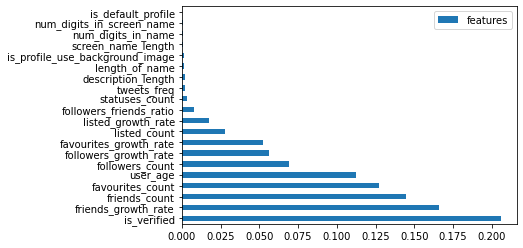

In [390]:
# Для начала определим важность каждого призанка
feature_importances = pd.DataFrame(data=first_model.feature_importances_, index=features_train.columns, columns=['features'])
feature_importances.sort_values(by='features', ascending=False, inplace=True)
feature_importances.plot(kind='barh')

In [391]:
# Создадим копию датафрейма
features_train_2 =  features_train.copy()

#Уберём столбцы, которые не оказывают влияние на целевое значение, чтобы с датафреймом было проще работать
features_train_2.pop('num_digits_in_screen_name')
features_train_2.pop('is_default_profile')
features_train_2.pop('num_digits_in_name')
features_train_2.pop('is_profile_use_background_image')
features_train_2.pop('screen_name_length')
features_train_2.pop('description_length')
features_train_2.pop('length_of_name')
features_train_2.pop('tweets_freq')
features_train_2.pop('statuses_count')
features_train_2.pop('followers_friends_ratio')

0           2.160377
1           5.374603
2           6.845815
3         578.950570
4          67.122549
            ...     
2395        6.500000
2396    23524.000000
2397    23524.000000
2398    23524.000000
2399    23524.000000
Name: followers_friends_ratio, Length: 2400, dtype: float64

In [392]:
# Посмотрим, что у нас осталось
features_train_2

,followers_count,friends_count,favourites_count,listed_count,is_verified,user_age,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate
0,6641,3074,13768,126,1,2711,2.449650,1.133899,5.078569,0.046477
1,8465,1575,4561,191,1,4424,1.913427,0.356013,1.030967,0.043174
2,3108,454,2400,77,0,1358,2.288660,0.334315,1.767305,0.056701
3,304528,526,599,1515,1,4214,72.265781,0.124822,0.142145,0.359516
4,13693,204,1177,452,1,3200,4.279063,0.063750,0.367812,0.141250
...,...,...,...,...,...,...,...,...,...,...
2395,13,2,0,5,0,788,0.016497,0.002538,0.000000,0.006345
2396,3,0,0,2,0,1382,0.002171,0.000000,0.000000,0.001447
2397,35504,0,2,140,0,1813,19.583012,0.000000,0.001103,0.077220
2398,19,0,0,4,0,1274,0.014914,0.000000,0.000000,0.003140


Как видно, в датафрейме осталось 10 наиболее значимых признаков

In [393]:
features_train_2.to_csv('/content/drive/MyDrive/Fedoseev/features_train_2.csv')

## 2.2 Обучить модель, обеспечивающую вероятность пропуска бота на уровне не выше 0,03, и имеющую насколько возможно низкую вероятность ложного обнаружения

In [394]:
# сделаем это, используя новый датафрейм и классификатор DecisionTree
X, y = features_train_2, classes_train

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=5, shuffle=True)

In [396]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTCPredict = DTC.predict(X_test)

F1-score without hypertuning for RandomForestClassifier:  0.9920634920634921
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       0.99      0.99      0.99       126

    accuracy                           1.00       480
   macro avg       0.99      0.99      0.99       480
weighted avg       1.00      1.00      1.00       480



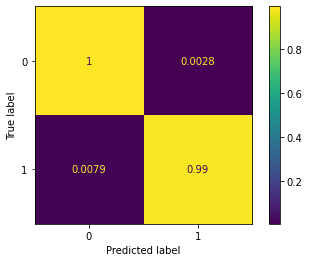

In [397]:
# посмотрим f-score и матрицу ошибок

print("F1-score without hypertuning for RandomForestClassifier: ", f1_score(y_test, DTCPredict))
plot_confusion_matrix(DTC, X_test, y_test, normalize='true')
print(classification_report(y_test, DTCPredict))

Как видно, вероятность пропуска бота существенно ниже 3%

In [398]:
with open('/content/drive/MyDrive/Fedoseev/DTC.pkl', 'wb') as f:
    pickle.dump(DTC, f)